In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pingouin as pg
import statsmodels.formula.api as smf
from scipy.stats import zscore
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "Arial"

In [2]:
# load
datapath = '../csv/ptm-wm.csv'
data = pd.read_csv(datapath)

# color
colors = ['royalblue', 'indianred']

# z score + etc
data['Na-fix-z'] = data.groupby('group')['Na-fix'].transform(zscore)
data['Af-fix-z'] = data.groupby('group')['Af-fix'].transform(zscore)
data['max-z'] = data[['Na-fix-z', 'Af-fix-z']].max(axis=1)
data['Na-larger'] = data['Na-fix-z'] > data['Af-fix-z']
data['min-z'] = data[['Na-fix-z', 'Af-fix-z']].min(axis=1)

# Baseline internal noise and WM

<Figure size 250x250 with 0 Axes>

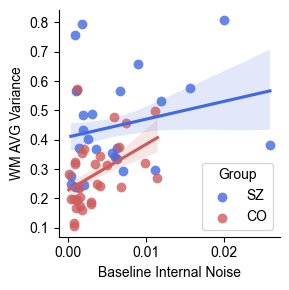

In [3]:
f = plt.figure()
f.set_size_inches(2.5, 2.5)

sns.lmplot(data=data, x='Na-fix', y='kavgvar', hue='group', palette=colors, legend=False, height=3, ci=68,
           scatter_kws={'linewidths': 0, 's':50})
plt.xlabel('Baseline Internal Noise')
plt.ylabel('WM AVG Variance')
plt.legend(title='Group')

sns.despine()

plt.savefig('corr-Na.pdf', dpi=300, transparent=True, bbox_inches="tight")

# External noise filtering and WM

<Figure size 250x250 with 0 Axes>

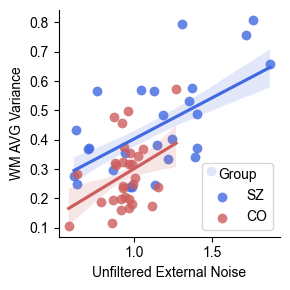

In [4]:
f = plt.figure()
f.set_size_inches(2.5, 2.5)

sns.lmplot(data=data, x='Af-fix', y='kavgvar', hue='group', palette=colors, legend=False, height=3, ci=68,
           scatter_kws={'linewidths': 0, 's':50})
plt.xlabel('Unfiltered External Noise')
plt.ylabel('WM AVG Variance')
plt.legend(title='Group', loc='lower right')

sns.despine()

plt.savefig('corr-Af.pdf', dpi=300, transparent=True, bbox_inches="tight")


In [5]:
# select data
data_CO = data[data['group']=='CO']

# model
results_CO_original = smf.ols("kavgvar ~ Na + Af + Nm", data=data_CO).fit()
print(results_CO_original.summary())

                            OLS Regression Results                            
Dep. Variable:                kavgvar   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     3.994
Date:                Wed, 14 May 2025   Prob (F-statistic):             0.0183
Time:                        10:36:53   Log-Likelihood:                 28.458
No. Observations:                  30   AIC:                            -48.92
Df Residuals:                      26   BIC:                            -43.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2097      0.158      1.328      0.1

# Effects of Na, and Af on WM variance in CO

In [6]:
# select data
data_CO = data[data['group']=='CO']

# model
results_CO = smf.ols("kavgvar ~ Na-fix + Af-fix", data=data_CO).fit()
print(results_CO.summary())

                            OLS Regression Results                            
Dep. Variable:                kavgvar   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     4.963
Date:                Wed, 14 May 2025   Prob (F-statistic):             0.0146
Time:                        10:36:53   Log-Likelihood:                 27.469
No. Observations:                  30   AIC:                            -48.94
Df Residuals:                      27   BIC:                            -44.73
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0373      0.092      0.407      0.6

# Effects of Na, and Af on WM variance in SZ

In [7]:
# select data
data_SZ = data[data['group']=='SZ']

# model
results_SZ = smf.ols("kavgvar ~ Na-fix + Af-fix", data=data_SZ).fit()
print(results_SZ.summary())

                            OLS Regression Results                            
Dep. Variable:                kavgvar   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     6.056
Date:                Wed, 14 May 2025   Prob (F-statistic):            0.00743
Time:                        10:36:53   Log-Likelihood:                 15.373
No. Observations:                  27   AIC:                            -24.75
Df Residuals:                      24   BIC:                            -20.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1542      0.088      1.747      0.0

# Max Noise

In [9]:
pg.ttest(data_CO['Na-fix'], data_SZ['Na-fix'], paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.717854,37.610921,two-sided,0.094047,"[-0.01, 0.0]",0.470384,0.906,0.413925


In [10]:
pg.ttest(data_CO['Af-fix'], data_SZ['Af-fix'], paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.907156,32.425507,two-sided,0.00653,"[-0.35, -0.06]",0.803162,7.938,0.844814


<Figure size 250x250 with 0 Axes>

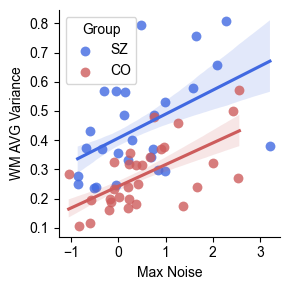

In [11]:
f = plt.figure()
f.set_size_inches(2.5, 2.5)

sns.lmplot(data=data, x='max-z', y='kavgvar', hue='group', palette=colors, legend=False, height=3, ci=68,
           scatter_kws={'linewidths': 0, 's':50})
plt.xlabel('Max Noise')
plt.ylabel('WM AVG Variance')
plt.legend(title='Group')

sns.despine()

plt.savefig('corr-max-z.pdf', dpi=300, transparent=True, bbox_inches="tight")

In [12]:
pg.corr(data_CO['max-z'], data_CO['kavgvar'])

,n,r,CI95%,p-val,BF10,power
pearson,30,0.619798,"[0.33, 0.8]",0.000259,131.0,0.968322


In [13]:
pg.corr(data_SZ['max-z'], data_SZ['kavgvar'])

,n,r,CI95%,p-val,BF10,power
pearson,27,0.490128,"[0.14, 0.73]",0.009451,5.85,0.760628
